In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from email.message import EmailMessage
import smtplib
import ssl
import serial
import time

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [27]:
data= pd.read_excel("C:\\Users\\DELL\\Desktop\\dataset.xls")
data.head()

,Temperature,RH,Ws,class
0,23.8,67.0,0.00,0
1,23.8,67.0,1.52,0
2,23.8,67.0,1.33,0
3,23.8,66.0,1.33,0
4,23.8,65.0,1.33,0


In [28]:
y=data['class']
x=data.drop('class', axis=1)

In [29]:
data.isnull().sum()

Temperature    0
RH             0
Ws             0
class          0
dtype: int64

In [30]:
data.shape

(495, 4)

In [31]:
# Remove null or na values rows
data =data.dropna().reset_index(drop=True) 
data.shape

(495, 4)

In [32]:
# Final datatypes check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  495 non-null    float64
 1   RH           495 non-null    float64
 2   Ws           495 non-null    float64
 3   class        495 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.6 KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_10172\3968421169.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


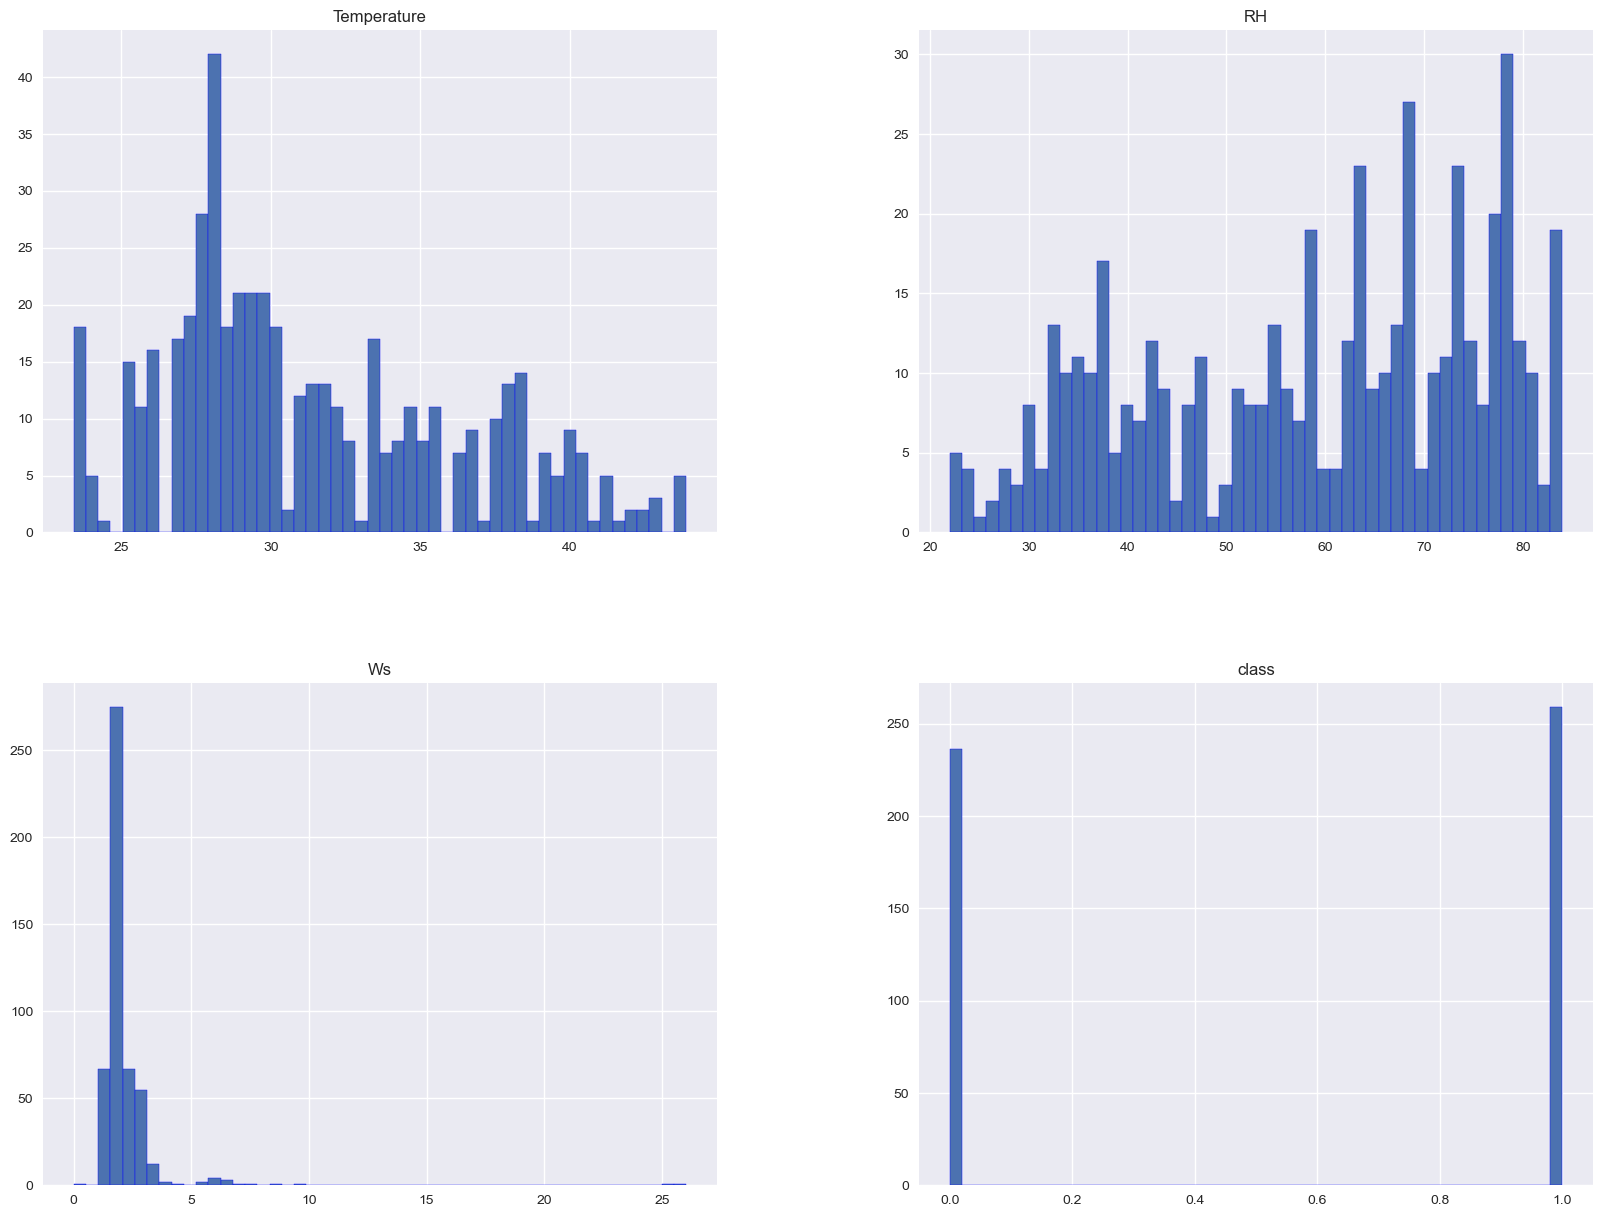

In [33]:

plt.style.use('seaborn')
data.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()


In [36]:

percentage = data['class'].value_counts(normalize=True) * 100
percentage

1    52.323232
0    47.676768
Name: class, dtype: float64

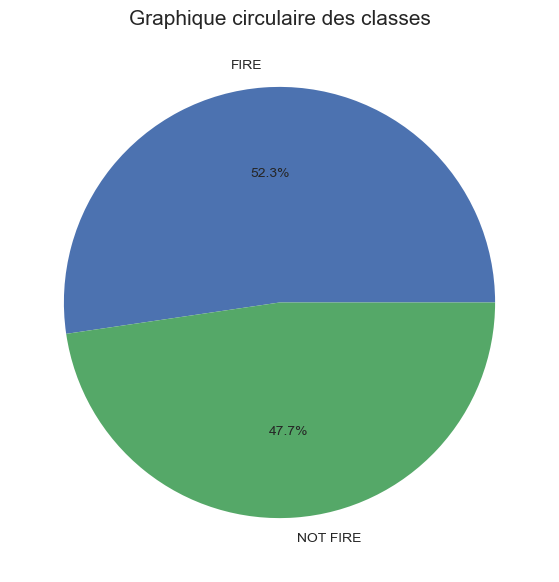

In [39]:

classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Graphique circulaire des classes", fontsize = 15)
plt.show() 

In [ ]:
# Plot the pie chart
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [87]:
RFC=RandomForestClassifier(criterion='entropy', n_estimators=24, random_state=2)

In [88]:
RFC.fit(x_train, y_train)
RFC.score(x_train, y_train)

1.0

In [89]:
RFC.score(x_test, y_test)

0.9797979797979798

In [90]:
ser = serial.Serial('COM9', 9600, timeout=4)

In [91]:
# Configuration des informations d'authentification pour l'envoi d'e-mails
email_sender = 'firepredection@gmail.com'
email_password = 'qavm wroh ooai kzzp'
email_receiver = 'popompiers9@gmail.com'

while True:    
    donnees_arduino = ser.readline().decode('ascii')
    print(donnees_arduino)
    donnees_split = donnees_arduino.split(',')

    temperature = donnees_split[0]
    humidity = donnees_split[1].split(';')[0]
    wind_speed = donnees_split[1].split(';')[1]
    
    print("Temperature :", temperature)
    print("Humidity :", humidity)
    print("Wind Speed :", wind_speed)
    
    # Création d'un DataFrame avec les données du capteur actuel
    current_data = pd.DataFrame([[float(temperature), float(humidity), float(wind_speed)]], columns=['Temperature', 'RH', 'Ws'])

    # Comparaison des données actuelles avec les données existantes
    prediction = RFC.predict(current_data)
    
    # Affichage de la prédiction
    print("Prédiction :", prediction)
    
    if prediction == 1:
        subject = 'Alert'
        body = 'fire'
        em = EmailMessage()
        em['From'] = email_sender
        em['To'] = email_receiver
        em['Subject'] = subject
        em.set_content(body)
        context = ssl.create_default_context()
        with smtplib.SMTP_SSL('smtp.gmail.com', 465, context=context) as smtp:
            smtp.login(email_sender, email_password)
            smtp.send_message(em)
            
    time.sleep(4)



24.80,62.00;1.52

Temperature : 24.80
Humidity : 62.00
Wind Speed : 1.52

Prédiction : [0]
24.80,62.00;4.37

Temperature : 24.80
Humidity : 62.00
Wind Speed : 4.37

Prédiction : [0]
24.80,61.00;4.18

Temperature : 24.80
Humidity : 61.00
Wind Speed : 4.18

Prédiction : [0]
24.80,62.00;4.37

Temperature : 24.80
Humidity : 62.00
Wind Speed : 4.37

Prédiction : [0]
25.30,62.00;4.18

Temperature : 25.30
Humidity : 62.00
Wind Speed : 4.18

Prédiction : [0]
25.30,62.00;4.18

Temperature : 25.30
Humidity : 62.00
Wind Speed : 4.18

Prédiction : [0]
25.30,63.00;4.37

Temperature : 25.30
Humidity : 63.00
Wind Speed : 4.37

Prédiction : [0]
25.80,63.00;4.37

Temperature : 25.80
Humidity : 63.00
Wind Speed : 4.37

Prédiction : [0]
26.20,63.00;4.18

Temperature : 26.20
Humidity : 63.00
Wind Speed : 4.18

Prédiction : [0]
26.70,62.00;4.18

Temperature : 26.70
Humidity : 62.00
Wind Speed : 4.18

Prédiction : [0]
27.10,63.00;4.18

Temperature : 27.10
Humidity : 63.00
Wind Speed : 4.18

Prédiction : [0]

SerialException: ClearCommError failed (PermissionError(13, 'Le périphérique ne reconnaît pas la commande.', None, 22))